<a href="https://colab.research.google.com/github/vc0408/CoffeeProject/blob/main/CoffeeProjectCleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Setup

Imports all necessary libraries and sets up configurations (e.g., plotting styles) so that the rest of the notebook can run smoothly

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tqdm import tqdm


# Data Loading and Initial Exploration
Loads the dataset from a CSV file and provides an initial overview (shape, sample rows, and metadata) to understand the data structure.

In [3]:
# Load the dataset from the CSV file
data = pd.read_csv('/content/arabica_ratings_raw.csv')

# Print the dimensions of the dataset
print("Data shape:", data.shape)

# Display the first few rows to preview the data
display(data.head())


# Print detailed information about the dataset
print("\nData Info:")
data.info()


# Display summary statistics for numeric columns
print("\nData Description:")
display(data.describe())

Data shape: (1312, 53)


,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,1,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,2,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,...,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,3,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,...,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,4,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1312 non-null   int64  
 1   quality_score                     1312 non-null   float64
 2   view_certificate_1                0 non-null      float64
 3   view_certificate_2                0 non-null      float64
 4   Cupping Protocol and Descriptors  0 non-null      float64
 5   View Green Analysis Details       0 non-null      float64
 6   Request a Sample                  0 non-null      float64
 7   Species                           1312 non-null   object 
 8   Owner                             1305 non-null   object 
 9   Country of Origin                 1311 non-null   object 
 10  Farm Name                         956 non-null    object 
 11  Lot Number                        270 non-null    object 

,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Number of Bags,Aroma,Flavor,...,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,NA.2,Quakers,NA.3,Unnamed: 51
count,1312.000000,1312.000000,0.0,0.0,0.0,0.0,0.0,1312.000000,1312.000000,1312.000000,...,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,0.0,1311.000000,0.0,0.0
mean,655.309451,82.086212,NaN,NaN,NaN,NaN,NaN,153.770579,7.562614,7.516913,...,7.516570,7.516349,9.825899,9.825625,9.895724,7.496723,NaN,0.176964,NaN,NaN
std,378.860186,3.675542,NaN,NaN,NaN,NaN,NaN,129.753818,0.380976,0.402017,...,0.361512,0.408316,0.621552,0.817449,0.596925,0.476228,NaN,0.840276,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,327.750000,81.170000,NaN,NaN,NaN,NaN,NaN,14.000000,7.420000,7.330000,...,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,NaN,0.000000,NaN,NaN
50%,655.500000,82.500000,NaN,NaN,NaN,NaN,NaN,172.500000,7.580000,7.580000,...,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,NaN,0.000000,NaN,NaN
75%,983.250000,83.670000,NaN,NaN,NaN,NaN,NaN,275.000000,7.750000,7.750000,...,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,NaN,0.000000,NaN,NaN
max,1310.000000,90.580000,NaN,NaN,NaN,NaN,NaN,1062.000000,8.750000,8.830000,...,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,NaN,11.000000,NaN,NaN


# Data Cleaning and Preprocessing
Functions are defined and applied to clean and standardize key columns such as bag weight, altitude, harvest year, moisture, and defects, as well as to normalize processing methods.



In [4]:
def clean_weight(val):
    try:
        # Convert value to string, lower-case it, and remove extra spaces.
        s = str(val).lower().strip()
        # Check for 'kg' and process accordingly.
        if 'kg' in s:
            return float(s.replace('kg', '').strip())
        # Check for 'lb' or 'lbs' and convert from pounds to kilograms.
        elif 'lb' in s or 'lbs' in s:
            return float(s.replace('lbs', '').replace('lb', '').strip()) * 0.453592
        # If the numeric value is zero, return NaN.
        elif float(s) == 0:
            return np.nan
        # Otherwise, assume the value is already in kg.
        else:
            return float(s)
    except:
        return np.nan

# Apply the bag weight cleaning function and remove rows with invalid weight.
data['Bag Weight'] = data['Bag Weight'].apply(clean_weight)
data = data[data['Bag Weight'] != 0]


# Clean "Altitude": Extract numeric values from the altitude description.
def clean_altitude(val):
    # Return NaN if the input is missing.
    if pd.isna(val):
        return np.nan
    # Find all digit sequences in the string.
    numbers = re.findall(r'\d+', str(val))
    # If no numbers are found, return NaN.
    if not numbers:
        return np.nan
    # Convert the found numbers into integers.
    numbers = list(map(int, numbers))
    # If multiple numbers are present (indicating a range), return the average of the first two; otherwise, return the single number.
    return sum(numbers[:2]) / 2 if len(numbers) >= 2 else numbers[0]

# Apply the altitude cleaning, convert values to numeric, and drop rows with invalid altitude.
data['Altitude'] = data['Altitude'].apply(clean_altitude)
data['Altitude'] = pd.to_numeric(data['Altitude'], errors='coerce')
data = data.dropna(subset=['Altitude']).reset_index(drop=True)


# Clean "Harvest Year": Extract and standardize the latest year from mixed year formats.
def get_lastyear(val):
    # Return NaN if the input is missing.
    if pd.isna(val):
        return np.nan
    # Extract all digit sequences from the input string.
    numbers = re.findall(r'\d+', str(val))
    # If no numbers are found, return NaN.
    if not numbers:
        return np.nan
    clean_years = []
    # For each extracted number, determine if it is a 4-digit year or a 2-digit year (assumed to be in the 2000s).
    for y in numbers:
        if len(y) == 4:
            clean_years.append(int(y))
        elif len(y) == 2:
            clean_years.append(2000 + int(y))
    # Return the last valid year extracted, or NaN if none.
    return clean_years[-1] if clean_years else np.nan

# Apply the harvest year cleaning function, convert values to numeric with Int64 type, and drop rows missing a valid year.
data['Harvest Year'] = data['Harvest Year'].apply(get_lastyear)
data['Harvest Year'] = pd.to_numeric(data['Harvest Year'], errors='coerce').astype('Int64')
data = data.dropna(subset=['Harvest Year']).reset_index(drop=True)


# Clean "Moisture": Remove the '%' symbol, then convert the value to a decimal fraction.
data['Moisture'] = data['Moisture'].astype(str).str.replace('%', '').str.strip()
data['Moisture'] = pd.to_numeric(data['Moisture'], errors='coerce') / 100


# Clean "Total Cup Points": Extract the numeric score from a string value.
def extract_numeric(val):
    try:
        # Split the string, take the last segment, and convert it to a float.
        return float(str(val).strip().split()[-1])
    except:
        return np.nan

# Apply the cup points extraction function.
data['Total Cup Points'] = data['Total Cup Points'].apply(extract_numeric)


# Clean defect columns ("Category One Defects" and "Category Two Defects"): Extract numeric digits.
for col in ['Category One Defects', 'Category Two Defects']:
    # Convert the column to string and extract the first sequence of digits.
    data[col] = data[col].astype(str).str.extract(r'(\d+)')
    # Convert the extracted digits to numeric.
    data[col] = pd.to_numeric(data[col], errors='coerce')


# Clean "Quakers": Convert the column values to numeric.
data['Quakers'] = pd.to_numeric(data['Quakers'], errors='coerce')


# Standardize "Processing Method": Map various method labels to a standard set.
processing_map = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Semi-washed",
    "Honey Mossto": "Natural / Dry",
    "Pulped natural / honey": "Natural / Dry",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Semi-washed"
}
# Apply the mapping to standardize the processing method values.
data['Processing Method'] = data['Processing Method'].apply(lambda x: processing_map[x] if x in processing_map else x)
# Remove rows where the processing method is categorized as 'Other'.
data = data[data['Processing Method'] != 'Other']


<ipython-input-4-0d8aaff3d9d1>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Altitude'] = data['Altitude'].apply(clean_altitude)
<ipython-input-4-0d8aaff3d9d1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Altitude'] = pd.to_numeric(data['Altitude'], errors='coerce')


# Exploratory Data Analysis and Visualizations
This section generates insightful visualizations (correlation heatmaps, choropleth maps, and histograms) to explore variable relationships and distributions within the data.

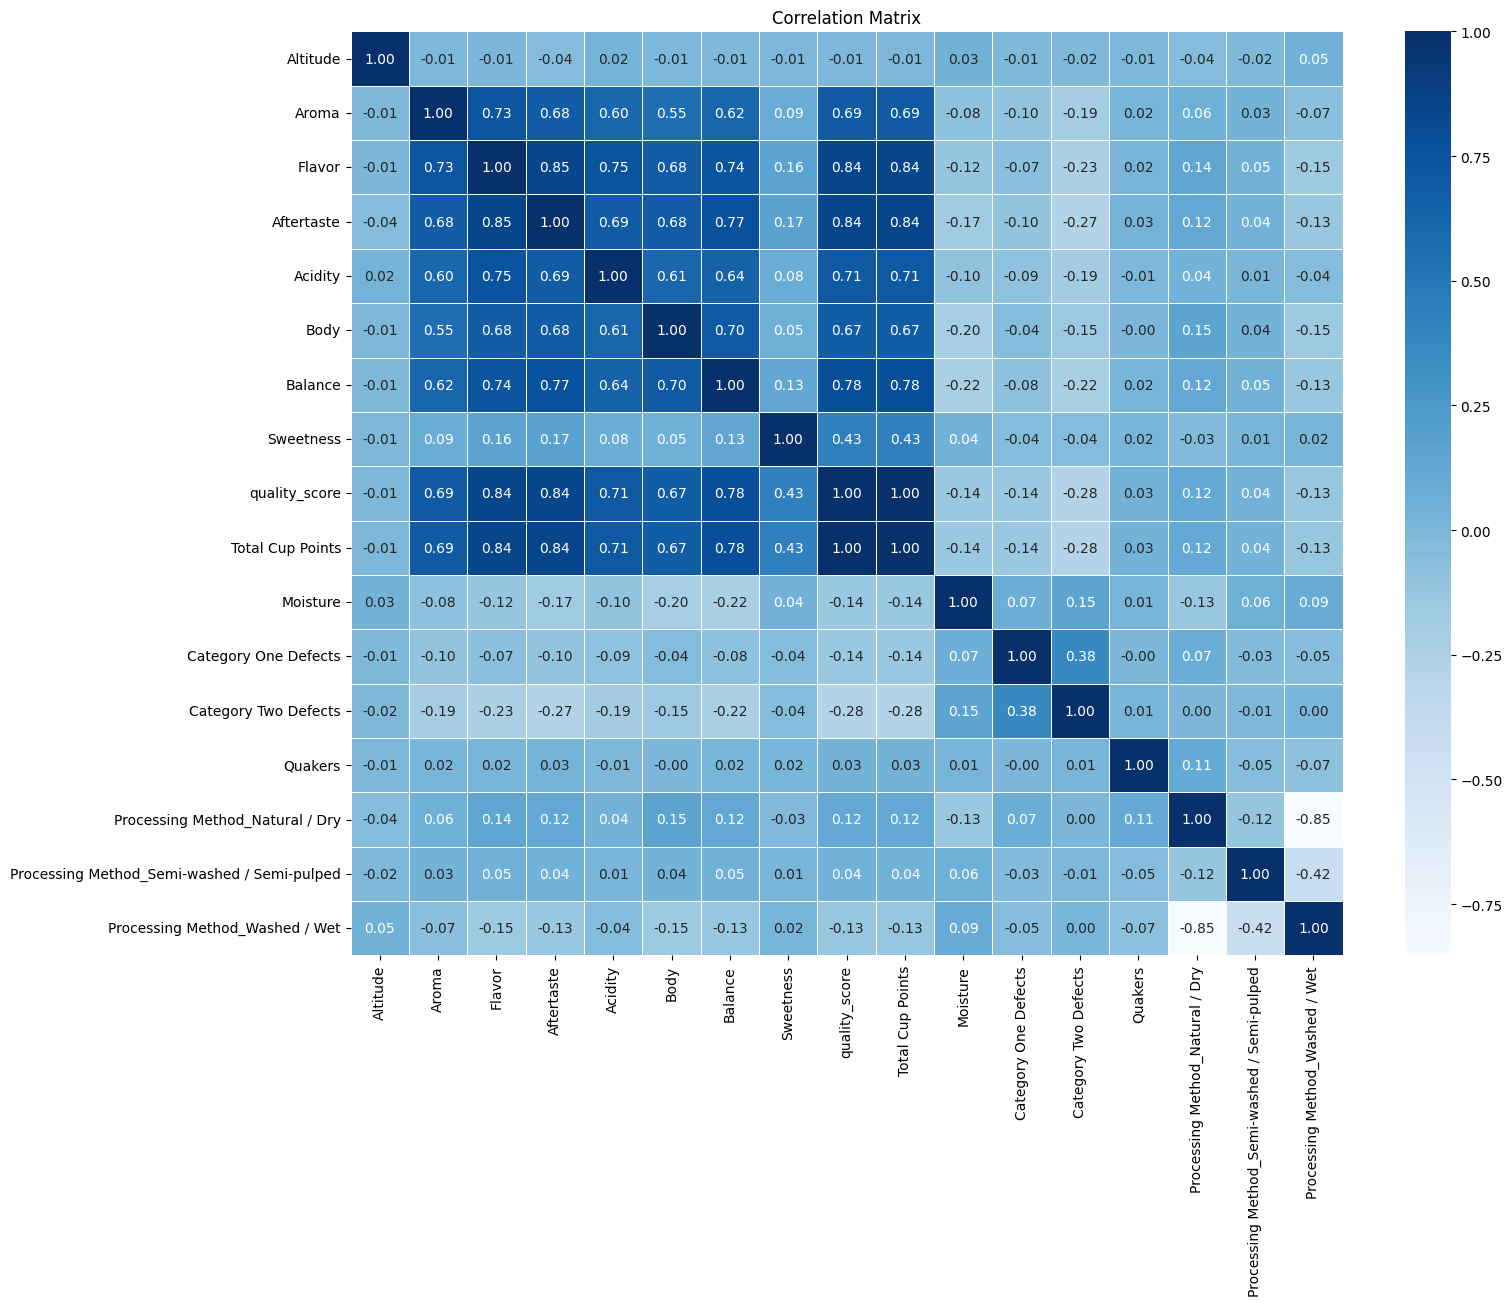

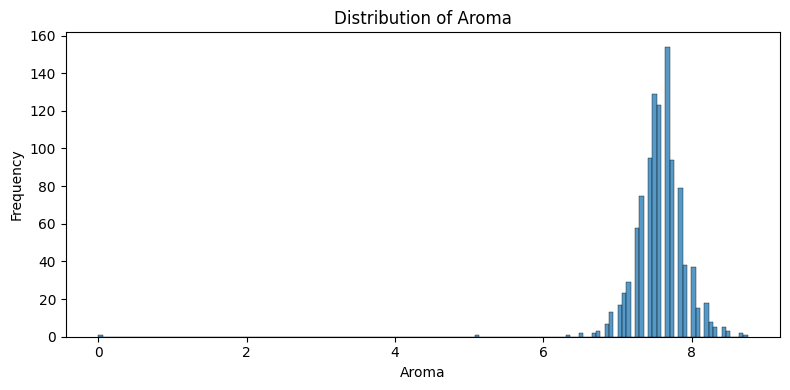

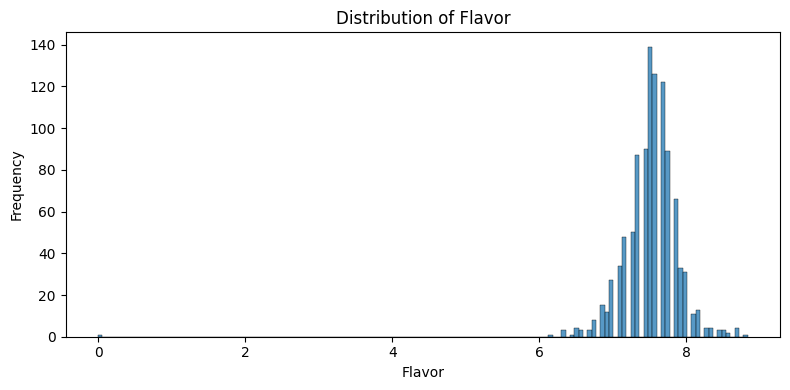

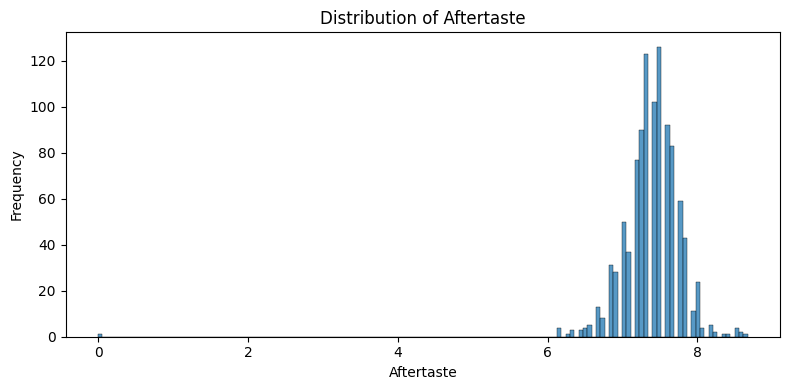

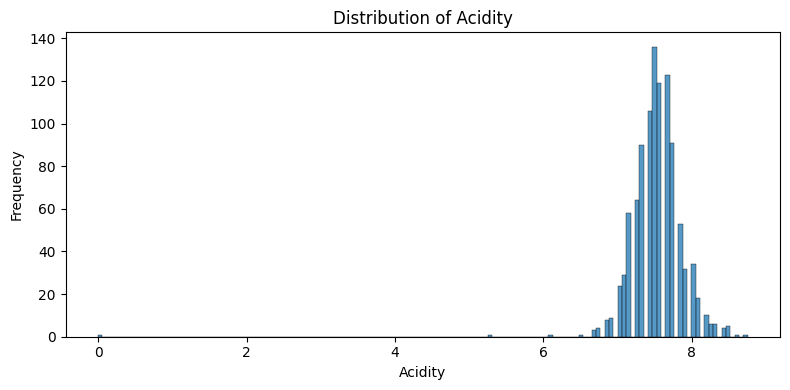

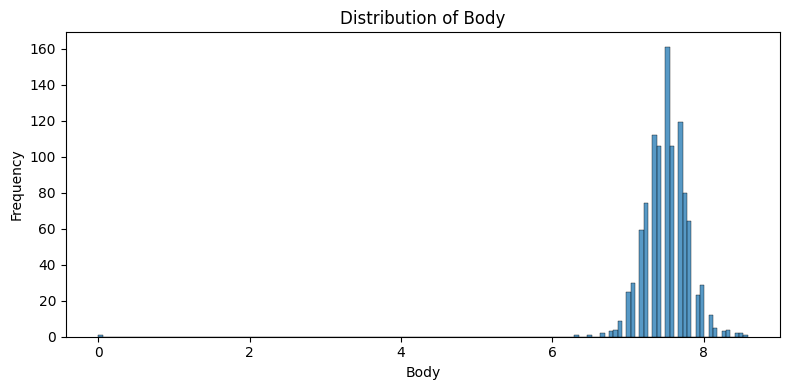

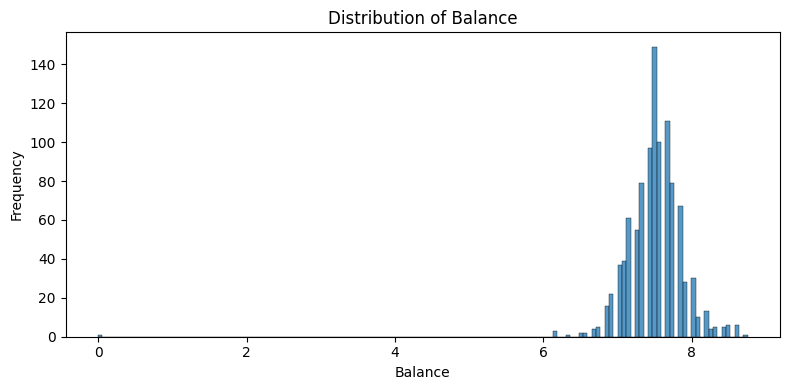

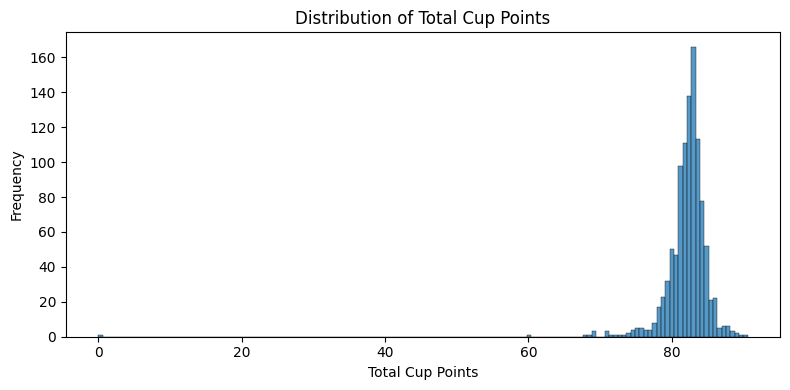

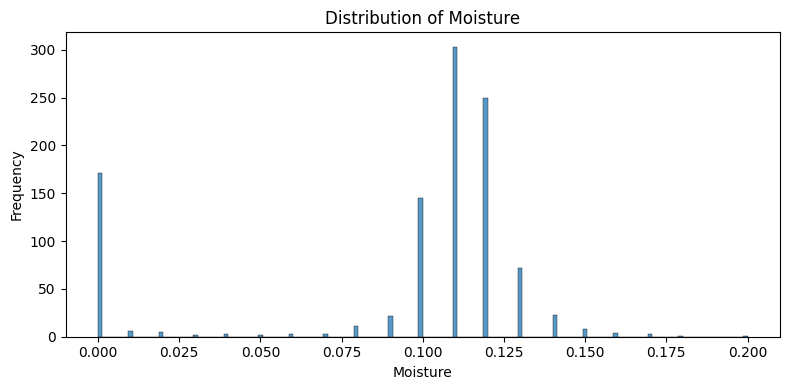

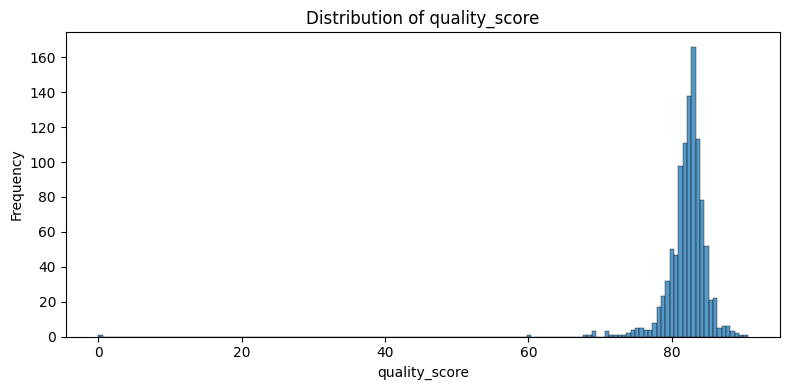

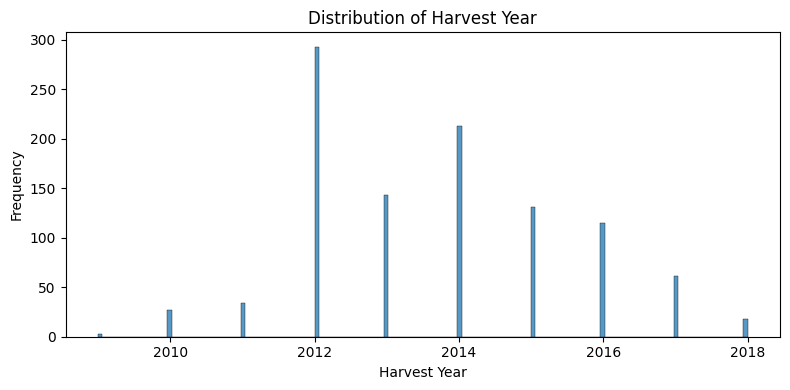

In [5]:
# Create a Correlation Matrix for numeric features and the processing method.
# First, define a list of numeric columns you want to include in the correlation analysis.
numeric_cols = [
    'Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
    'Balance', 'Sweetness', 'quality_score', 'Total Cup Points',
    'Moisture', 'Category One Defects', 'Category Two Defects', 'Quakers'
]

# Select the numeric columns and the "Processing Method" column, and drop rows with any missing values.
clean_data = data[numeric_cols + ['Processing Method']].dropna()

# One-hot encode the "Processing Method" column so that it can be included in the correlation matrix.
processing_dummies = pd.get_dummies(clean_data['Processing Method'], prefix='Processing Method')

# Concatenate the numeric columns with the one-hot encoded "Processing Method" columns.
corr_df = pd.concat([clean_data[numeric_cols], processing_dummies], axis=1)

# Compute the correlation matrix.
corr_matrix = corr_df.corr()

# Plot the correlation matrix as a heatmap.
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# Create a Choropleth Map of Average Total Cup Points by Country.
# First, drop rows that are missing values in "Total Cup Points" or "Country of Origin".
data_clean = data.dropna(subset=['Total Cup Points', 'Country of Origin'])

# Group the cleaned data by "Country of Origin" and compute the mean of "Total Cup Points" for each country.
avg_points = data_clean.groupby('Country of Origin', as_index=False)['Total Cup Points'].mean()

# Create a choropleth map using Plotly Express: countries are colored according to the average total cup points.
fig = px.choropleth(
    avg_points,
    locations='Country of Origin',
    locationmode='country names',
    color='Total Cup Points',
    hover_name='Country of Origin',
    color_continuous_scale=px.colors.sequential.YlOrRd,
    title='Average Total Cup Points by Country'
)

# Tidy up the layout with appropriate margins and a labeled color bar.
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0), coloraxis_colorbar=dict(title='Avg Cup Points'))
fig.show()


# Plot Histograms for Key Features to Understand Their Distributions.
# Define a list of features for which you want to plot distributions.
features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Total Cup Points', 'Moisture', 'quality_score', 'Harvest Year']

# For each feature, create a histogram with 150 bins and without a kernel density estimate.
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature].dropna(), bins=150, kde=False)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()





# Setup for Quality Score Prediction
Here, the dataset is transformed by scaling numerical features and one-hot encoding categorical variables, preparing the data for subsequent regression modeling.

In [6]:
# Create a new DataFrame (qData) selecting relevant columns for quality score prediction and sensory analysis.
qData = data[['Country of Origin', 'Region', 'Altitude', 'Moisture',
              'Category One Defects', 'Category Two Defects', 'Quakers',
              'Processing Method', 'Harvest Year', 'quality_score',
              'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Sweetness', 'Number of Bags', 'Bag Weight']]

# Remove rows where the number of bags is zero.
qData = qData[qData['Number of Bags'] != 0]

# Define the list of columns that require scaling.
scale_cols = ['Altitude', 'Moisture', 'Category One Defects', 'Category Two Defects', 'Quakers', 'Harvest Year']

# Drop any remaining rows with missing values.
qData = qData.dropna()

# Scale the specified numeric columns using StandardScaler.
scaler = StandardScaler()
qData[scale_cols] = scaler.fit_transform(qData[scale_cols])

# One-hot encode the categorical columns to prepare the data for modeling.
qData_encoded = pd.get_dummies(qData,
                               columns=['Processing Method', 'Country of Origin', 'Region'],
                               drop_first=True)
# Drop any rows that still have missing values after encoding.
qData_encoded = qData_encoded.dropna()

# Display information about the final encoded DataFrame.
qData_encoded.info()



<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 1061
Columns: 442 entries, Altitude to Region_苗栗泰安
dtypes: bool(426), float64(15), int64(1)
memory usage: 532.4 KB


# Regression Analysis – Predicting Quality Score
Several regression models (Linear Regression, Decision Tree, Random Forest, SVR) are used to predict the overall quality score using external factors, while also visualizing model performance.

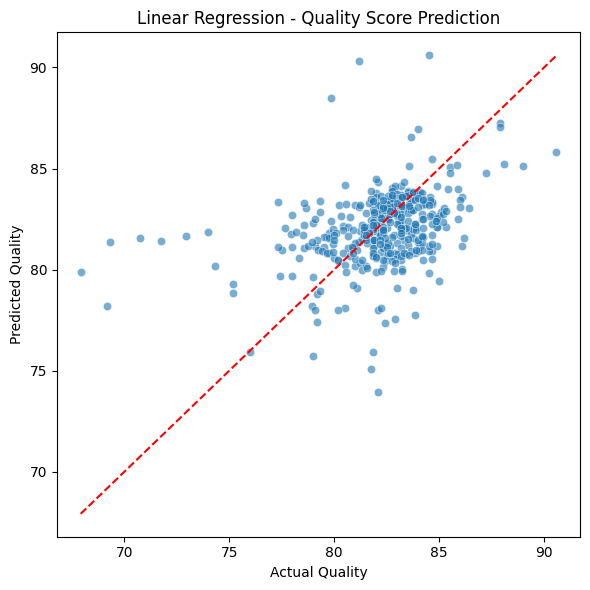

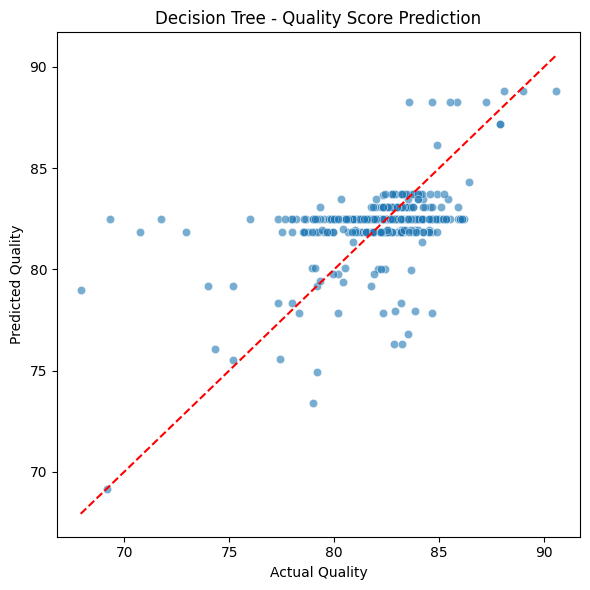

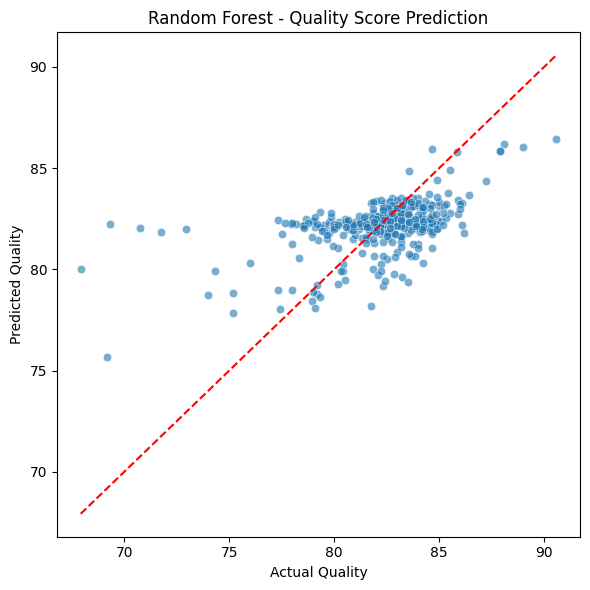

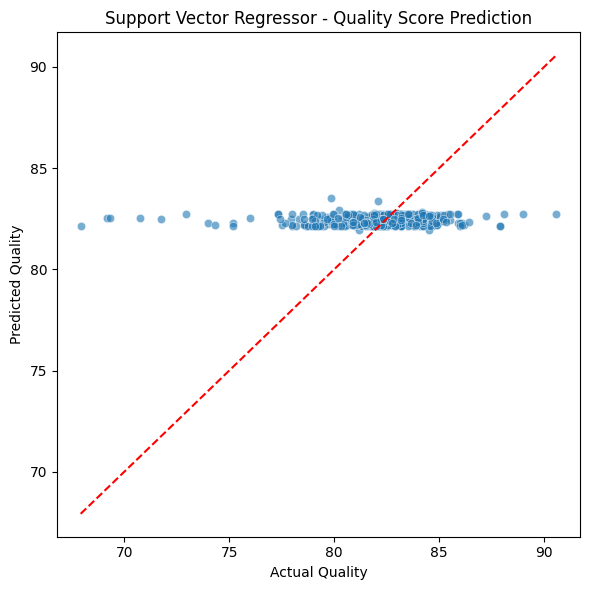


Model Comparison for Quality Score Prediction:
Linear Regression: {'Train MSE': 2.11557521130197, 'Train R2': 0.679070919925117, 'Test MSE': 6.617567930994475, 'Test R2': 0.017392774017653934, 'Test Accuracy': np.float64(0.211340206185567)}
Decision Tree: {'Train MSE': 1.9803982536489846, 'Train R2': 0.6995770292967596, 'Test MSE': 5.338451724994595, 'Test R2': 0.20732188996973233, 'Test Accuracy': np.float64(0.27319587628865977)}
Random Forest: {'Train MSE': 2.037475606109078, 'Train R2': 0.6909184941994162, 'Test MSE': 4.804973488098343, 'Test R2': 0.2865352166699243, 'Test Accuracy': np.float64(0.27835051546391754)}
Support Vector Regressor: {'Train MSE': 6.546559833245007, 'Train R2': 0.006898259293976805, 'Test MSE': 6.739242510403249, 'Test R2': -0.00067403272949762, 'Test Accuracy': np.float64(0.27319587628865977)}


In [7]:
# Exclude sensory factors from the input features and set the target for quality score prediction.
target_factors = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Sweetness']
# Make a working copy of the encoded data.
df_reg = qData_encoded.copy()
# Remove the sensory factors and quality score from the predictors.
X = df_reg.drop(target_factors + ['quality_score'], axis=1)
# Set the target variable.
y = df_reg['quality_score']

# Split the data into training and testing sets (60% train, 40% test).
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define a set of regression models to compare.
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Initialize a dictionary to store the performance metrics for each model.
results = {}

# Loop over each model, train it, and evaluate its performance.
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model on the training set.
    y_pred_train = model.predict(x_train)  # Predict quality scores for the training set.
    y_pred_test = model.predict(x_test)    # Predict quality scores for the test set.

    # Calculate performance metrics (MSE, R2, and a rounding-based accuracy measure).
    results[name] = {
        "Train MSE": mean_squared_error(y_train, y_pred_train),
        "Train R2": r2_score(y_train, y_pred_train),
        "Test MSE": mean_squared_error(y_test, y_pred_test),
        "Test R2": r2_score(y_test, y_pred_test),
        "Test Accuracy": np.mean(np.round(y_pred_test) == np.round(y_test))
    }

    # Plot actual vs. predicted quality scores.
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line for perfect prediction.
    plt.xlabel('Actual Quality')
    plt.ylabel('Predicted Quality')
    plt.title(f'{name} - Quality Score Prediction')
    plt.tight_layout()
    plt.show()

# Print the performance metrics for all models.
print("\nModel Comparison for Quality Score Prediction:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")



# Regression Analysis – Predict Sensory Attributes
For each sensory attribute (such as Aroma, Flavor, etc.), this block builds regression models using external factors, reporting metrics and plotting predictions.


=== Predicting Aroma using external factors ===


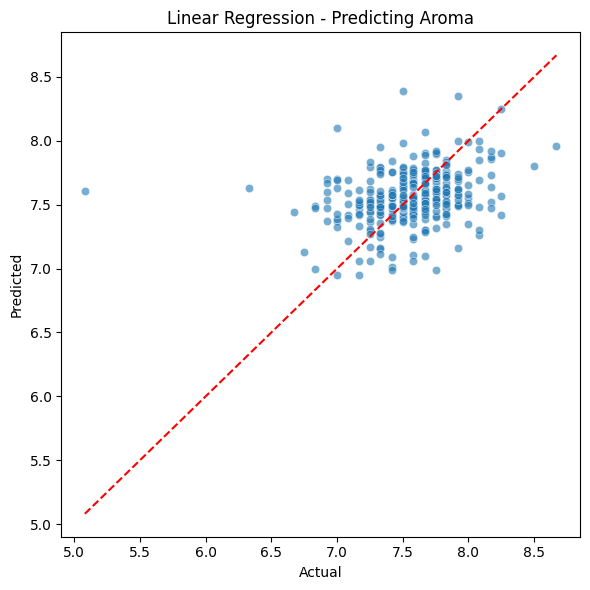

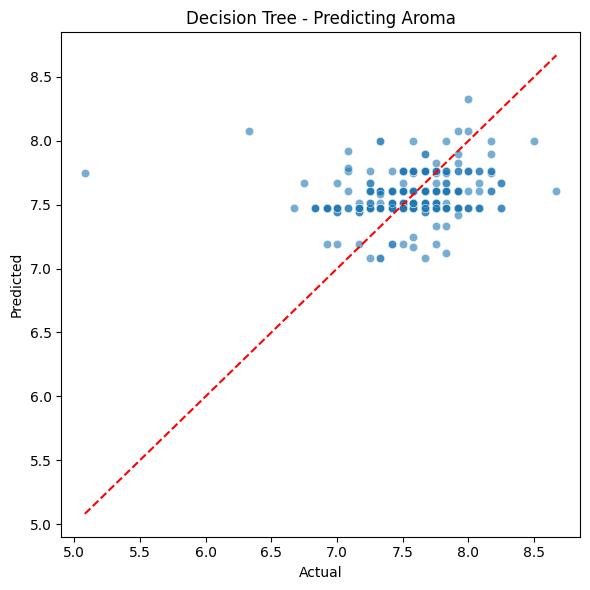

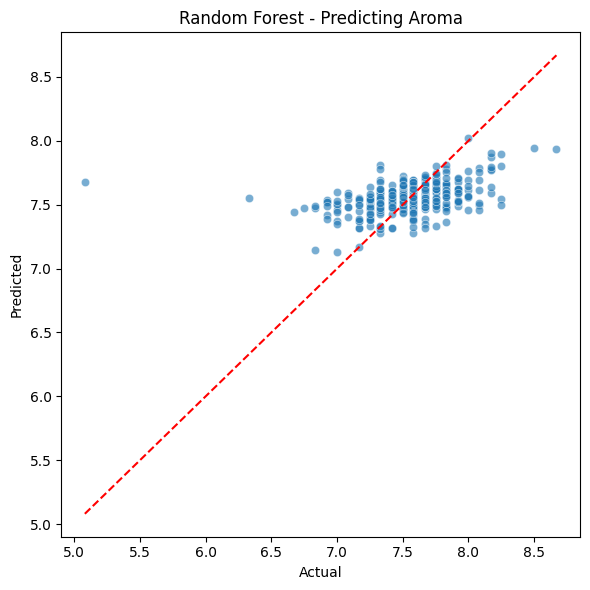

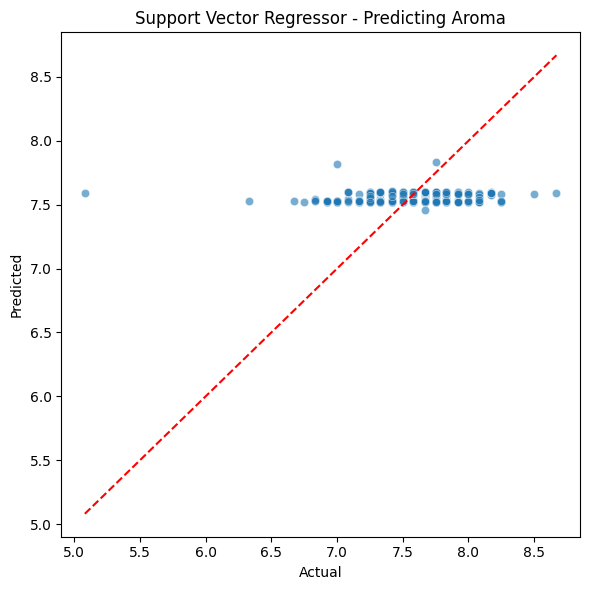


Model Comparison Results for Aroma:
Linear Regression: {'Train MSE': 0.02441412653448722, 'Train R2': 0.7096815609196935, 'Test MSE': 0.105663228835954, 'Test R2': -0.022735788670565027, 'Test Accuracy': np.float64(0.15721649484536082)}
Decision Tree: {'Train MSE': 0.03595342646029609, 'Train R2': 0.5724629904413255, 'Test MSE': 0.1056786620891267, 'Test R2': -0.022885170253251985, 'Test Accuracy': np.float64(0.15721649484536082)}
Random Forest: {'Train MSE': 0.03244779397948317, 'Train R2': 0.6141499108552573, 'Test MSE': 0.08327142781327321, 'Test R2': 0.19399898775994018, 'Test Accuracy': np.float64(0.16237113402061856)}
Support Vector Regressor: {'Train MSE': 0.08020824019803979, 'Train R2': 0.04621076396979973, 'Test MSE': 0.10113518059665816, 'Test R2': 0.021092107165784912, 'Test Accuracy': np.float64(0.13144329896907217)}

=== Predicting Flavor using external factors ===


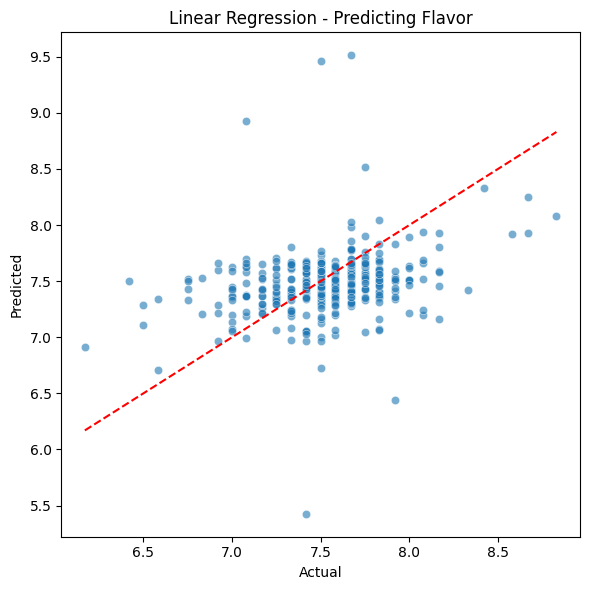

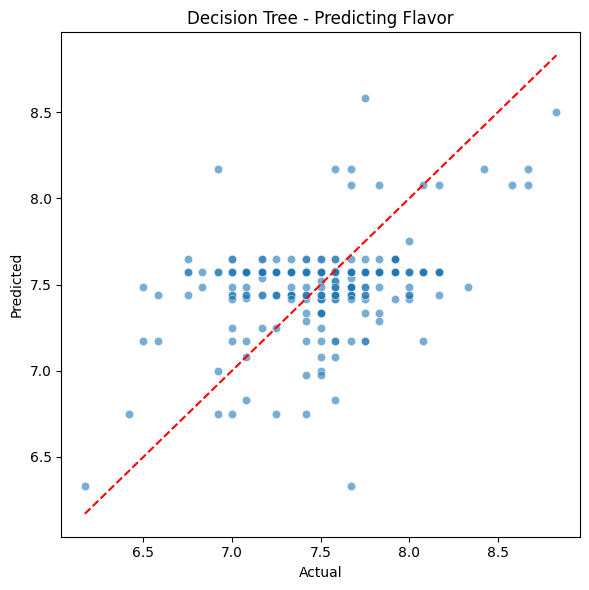

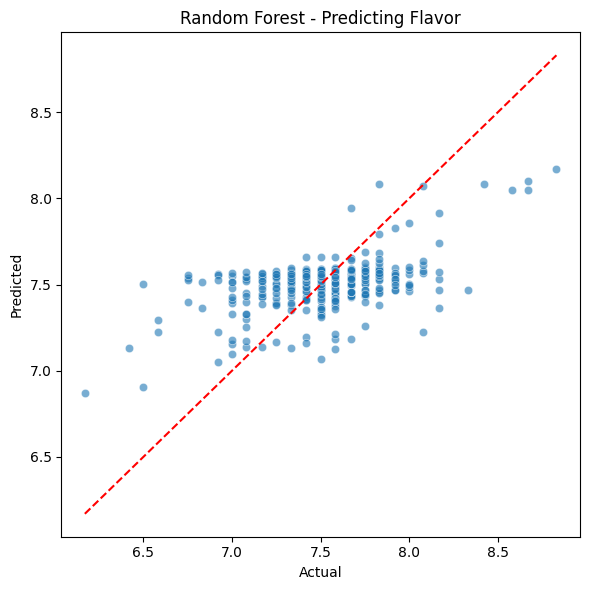

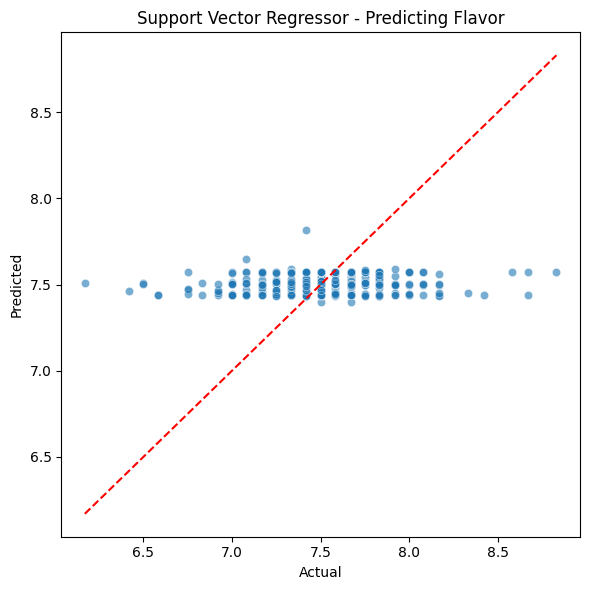


Model Comparison Results for Flavor:
Linear Regression: {'Train MSE': 0.03275168507292874, 'Train R2': 0.6816056707494865, 'Test MSE': 0.14477686970160905, 'Test R2': -0.30891898432591236, 'Test Accuracy': np.float64(0.12628865979381443)}
Decision Tree: {'Train MSE': 0.0492004066591694, 'Train R2': 0.5217000150613038, 'Test MSE': 0.1035879965275858, 'Test R2': 0.06346714442233303, 'Test Accuracy': np.float64(0.10051546391752578)}
Random Forest: {'Train MSE': 0.04388998907018418, 'Train R2': 0.5733250487815575, 'Test MSE': 0.08013163453857292, 'Test R2': 0.2755347044816071, 'Test Accuracy': np.float64(0.1134020618556701)}
Support Vector Regressor: {'Train MSE': 0.0992383549011367, 'Train R2': 0.03525789972899429, 'Test MSE': 0.10931741850913655, 'Test R2': 0.011667784370396284, 'Test Accuracy': np.float64(0.14175257731958762)}

=== Predicting Aftertaste using external factors ===


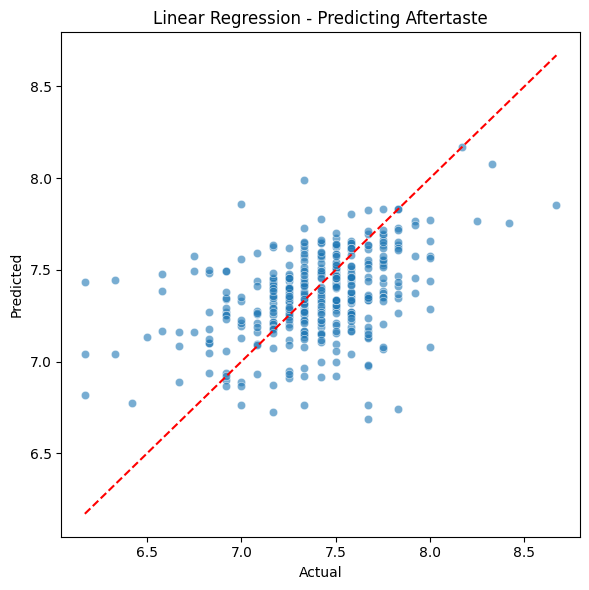

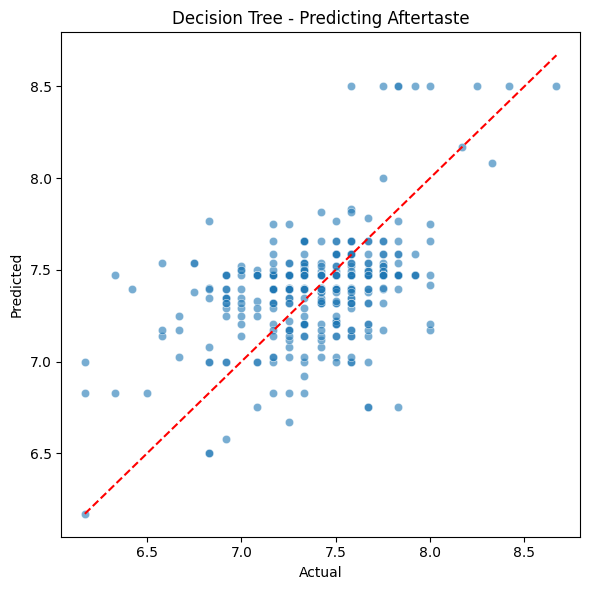

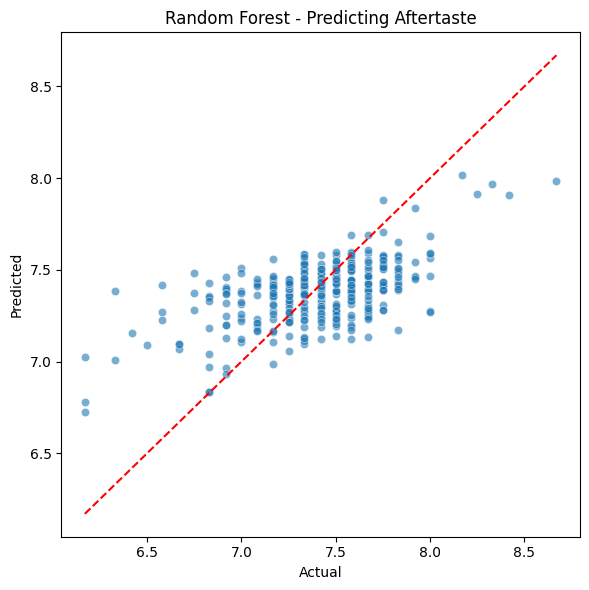

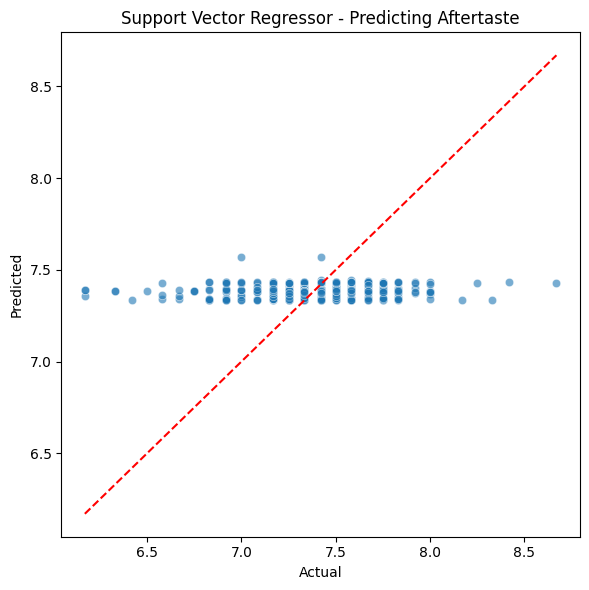


Model Comparison Results for Aftertaste:
Linear Regression: {'Train MSE': 0.0329372919796019, 'Train R2': 0.6987951922878978, 'Test MSE': 0.10120448308677488, 'Test R2': 0.10216123354411522, 'Test Accuracy': np.float64(0.15979381443298968)}
Decision Tree: {'Train MSE': 0.034472566297994674, 'Train R2': 0.6847554222259506, 'Test MSE': 0.10297656886359711, 'Test R2': 0.08644011863508594, 'Test Accuracy': np.float64(0.13144329896907217)}
Random Forest: {'Train MSE': 0.03640161049687545, 'Train R2': 0.6671147070344325, 'Test MSE': 0.07576098309246367, 'Test R2': 0.3278840469260641, 'Test Accuracy': np.float64(0.14432989690721648)}
Support Vector Regressor: {'Train MSE': 0.10662163796564127, 'Train R2': 0.02496689827205023, 'Test MSE': 0.11124383425080733, 'Test R2': 0.013096812777262379, 'Test Accuracy': np.float64(0.10824742268041238)}

=== Predicting Acidity using external factors ===


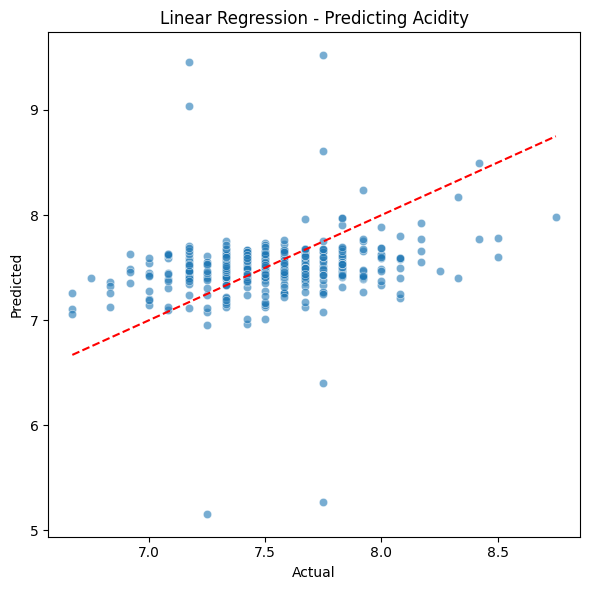

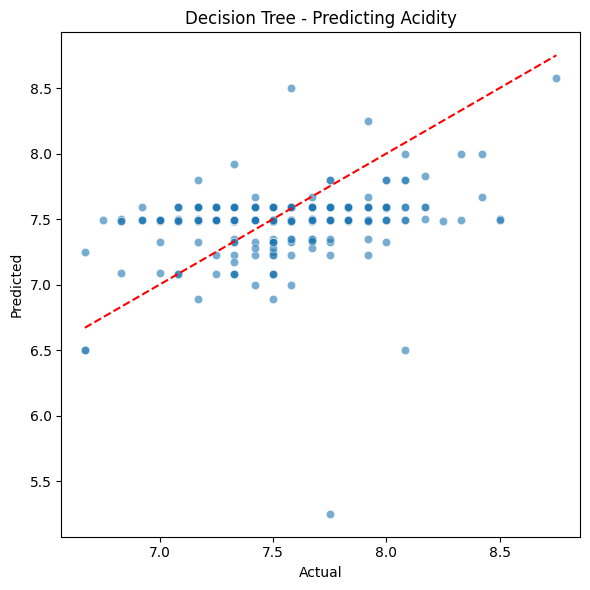

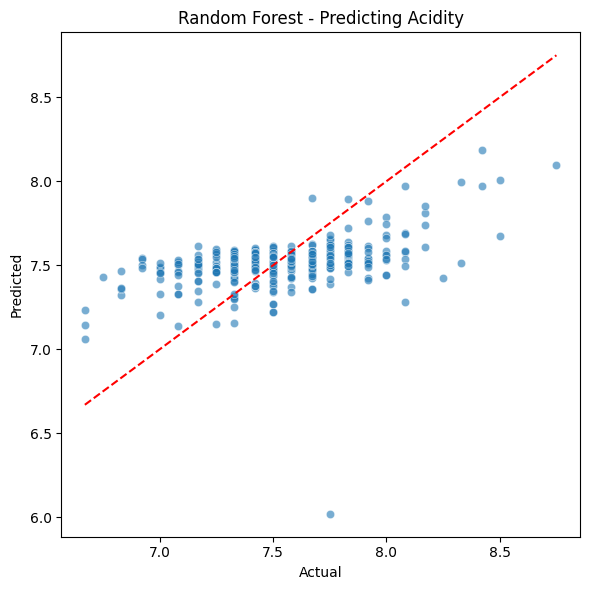

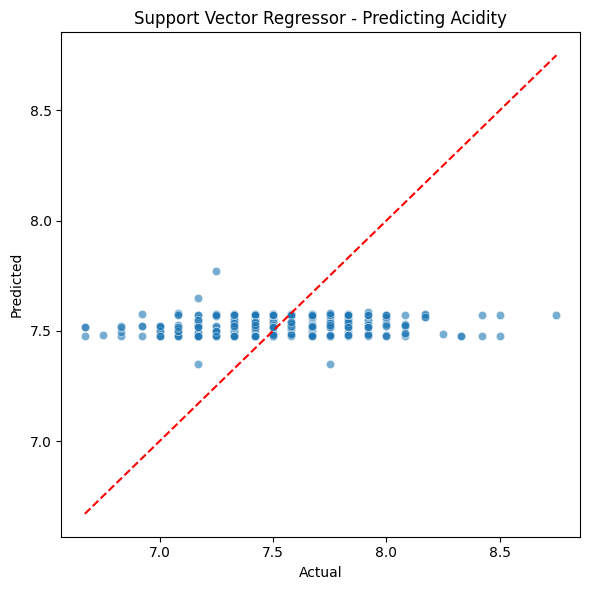


Model Comparison Results for Acidity:
Linear Regression: {'Train MSE': 0.023348860446982568, 'Train R2': 0.7459775855561592, 'Test MSE': 0.15299628187102932, 'Test R2': -0.5613246773986194, 'Test Accuracy': np.float64(0.12371134020618557)}
Decision Tree: {'Train MSE': 0.04141204592189835, 'Train R2': 0.5494603295083165, 'Test MSE': 0.11071438409622389, 'Test R2': -0.12983856809108363, 'Test Accuracy': np.float64(0.10824742268041238)}
Random Forest: {'Train MSE': 0.03797515816999718, 'Train R2': 0.5868517271267483, 'Test MSE': 0.078079815633227, 'Test R2': 0.20319669560560905, 'Test Accuracy': np.float64(0.12628865979381443)}
Support Vector Regressor: {'Train MSE': 0.08822963857827437, 'Train R2': 0.04011136354806166, 'Test MSE': 0.09576065937749798, 'Test R2': 0.02276396013279669, 'Test Accuracy': np.float64(0.10824742268041238)}

=== Predicting Body using external factors ===


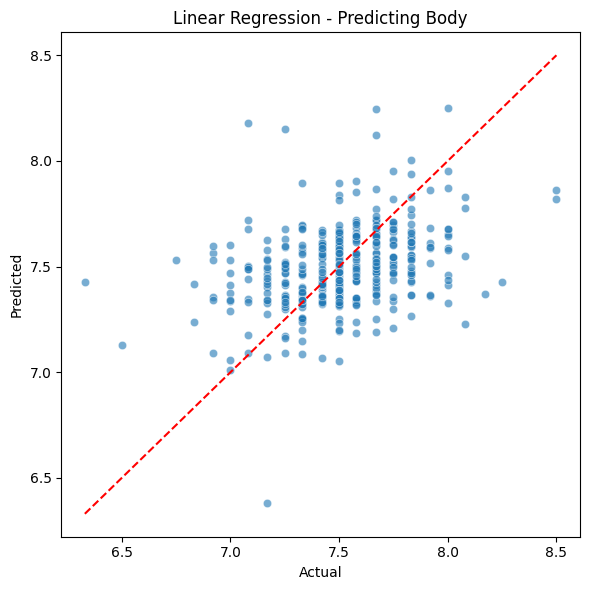

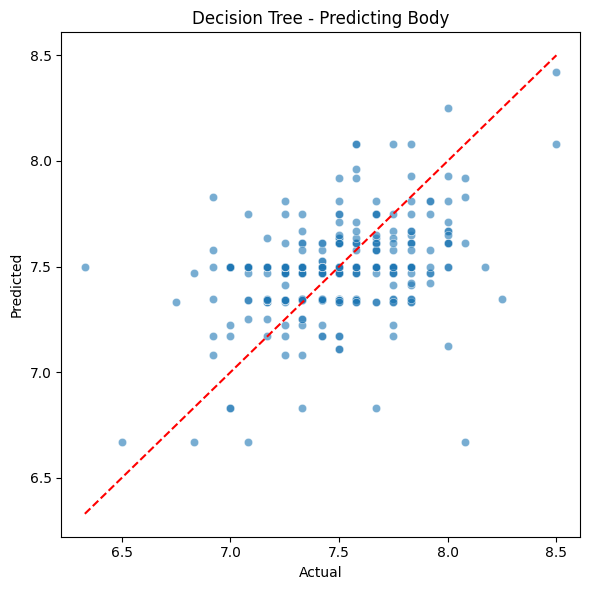

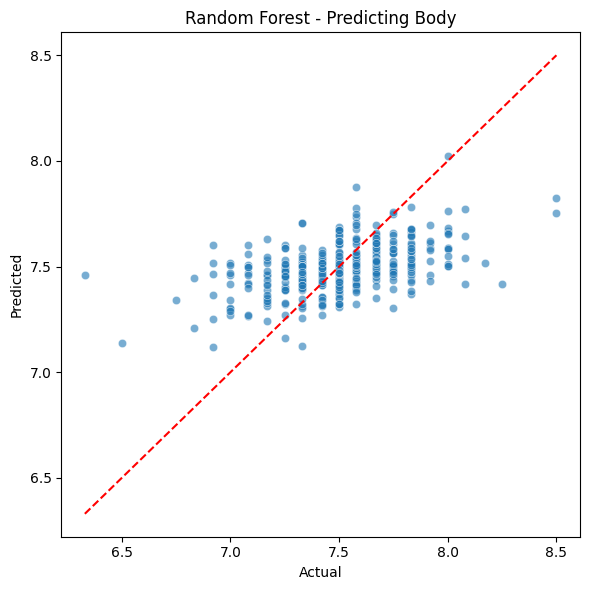

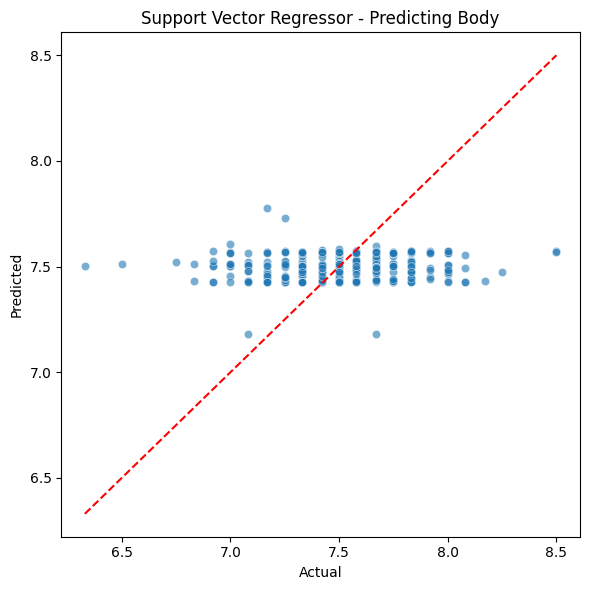


Model Comparison Results for Body:
Linear Regression: {'Train MSE': 0.02562065970202906, 'Train R2': 0.63417608366906, 'Test MSE': 0.07868753211058895, 'Test R2': 0.008700027894249507, 'Test Accuracy': np.float64(0.18041237113402062)}
Decision Tree: {'Train MSE': 0.03236570829216821, 'Train R2': 0.5378670846118744, 'Test MSE': 0.07535604907359147, 'Test R2': 0.05066981590342201, 'Test Accuracy': np.float64(0.15206185567010308)}
Random Forest: {'Train MSE': 0.029192994360201018, 'Train R2': 0.5831685971212519, 'Test MSE': 0.06058746067345613, 'Test R2': 0.23672344951490698, 'Test Accuracy': np.float64(0.16494845360824742)}
Support Vector Regressor: {'Train MSE': 0.06697511848245366, 'Train R2': 0.04369753062839632, 'Test MSE': 0.07881507700871071, 'Test R2': 0.007093226275758702, 'Test Accuracy': np.float64(0.14432989690721648)}

=== Predicting Balance using external factors ===


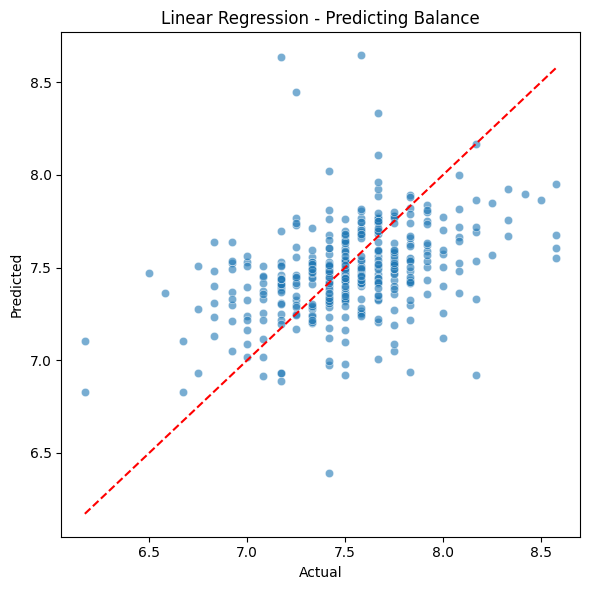

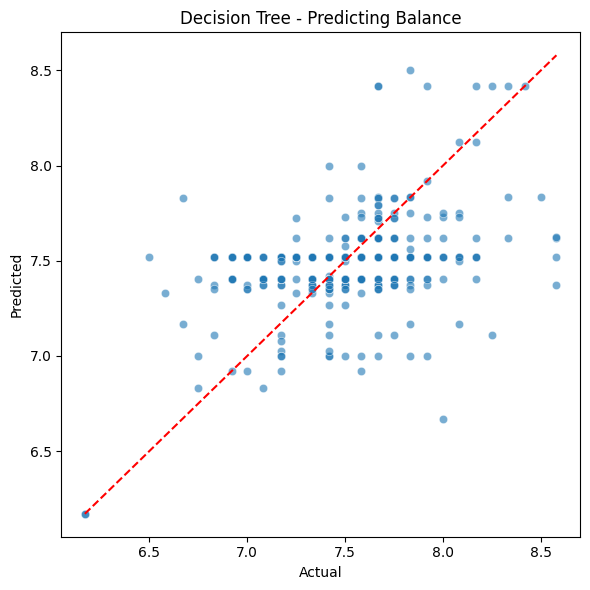

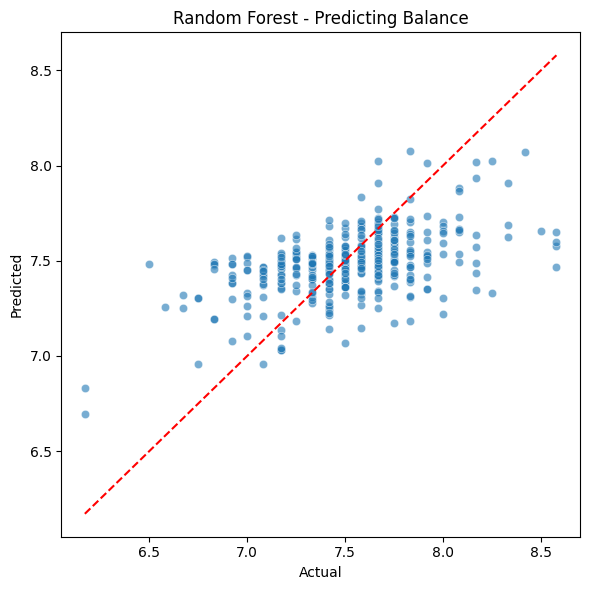

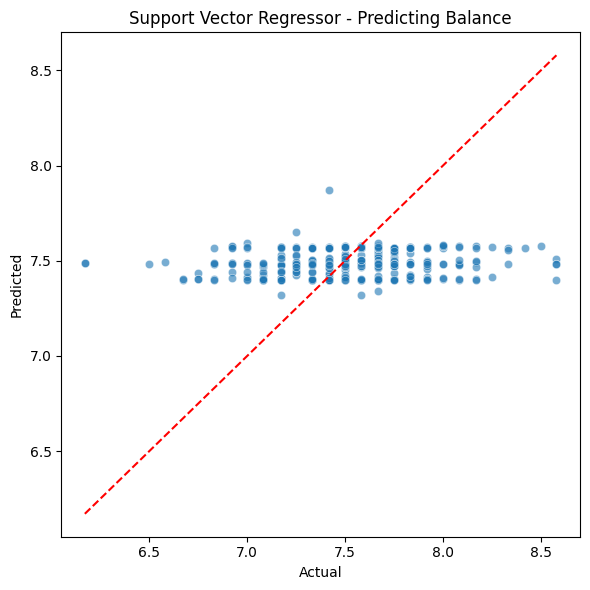


Model Comparison Results for Balance:
Linear Regression: {'Train MSE': 0.03344872516257706, 'Train R2': 0.6814464459099224, 'Test MSE': 0.12019882535636428, 'Test R2': 0.05282733515469418, 'Test Accuracy': np.float64(0.13402061855670103)}
Decision Tree: {'Train MSE': 0.045445127471864924, 'Train R2': 0.5671970515505341, 'Test MSE': 0.11645135967606837, 'Test R2': 0.08235754931692651, 'Test Accuracy': np.float64(0.19072164948453607)}
Random Forest: {'Train MSE': 0.03577625116313163, 'Train R2': 0.6592799305611325, 'Test MSE': 0.09340281391238459, 'Test R2': 0.2639812253143681, 'Test Accuracy': np.float64(0.17525773195876287)}
Support Vector Regressor: {'Train MSE': 0.09856584898492773, 'Train R2': 0.06129452308144445, 'Test MSE': 0.1249249577517944, 'Test R2': 0.015585179067731714, 'Test Accuracy': np.float64(0.13917525773195877)}


In [11]:
# Define the sensory attributes to be predicted.
target_factors = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']

# Loop over each sensory attribute to predict using external factors.
for target in target_factors:
    # Print a header indicating which attribute is being predicted.
    print(f"\n=== Predicting {target} using external factors ===")

    # Make a copy of the fully encoded data for regression.
    df_reg = qData_encoded.copy()

    # Remove the sensory factors and the overall quality score from the predictors.
    X = df_reg.drop(target_factors + ['quality_score'], axis=1)

    # Set the current sensory attribute as the target variable.
    y = df_reg[target]

    # Split the data into training and testing sets (60% train, 40% test).
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    # Define a set of regression models to evaluate.
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        "Support Vector Regressor": SVR(kernel='rbf')
    }

    # Initialize a dictionary to hold the results for each model.
    results = {}

    # Loop over each model to train and evaluate its performance.
    for name, model in models.items():
        # Fit the model on the training data.
        model.fit(x_train, y_train)
        # Predict on both the training and testing data.
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # Store performance metrics: MSE and R² for training and testing, plus a rounded accuracy measure.
        results[name] = {
            "Train MSE": mean_squared_error(y_train, y_pred_train),
            "Train R2": r2_score(y_train, y_pred_train),
            "Test MSE": mean_squared_error(y_test, y_pred_test),
            "Test R2": r2_score(y_test, y_pred_test),
            "Test Accuracy": np.mean(np.round(y_pred_test, 1) == np.round(y_test, 1))
        }

        # Plot the actual vs. predicted sensory attribute for the test set.
        plt.figure(figsize=(6,6))
        sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line for perfect prediction.
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{name} - Predicting {target}')
        plt.tight_layout()
        plt.show()

    # After processing each sensory attribute, print the comparison results of all models.
    print(f"\nModel Comparison Results for {target}:")
    for model_name, metrics in results.items():
        print(f"{model_name}: {metrics}")


# Random Forest Hyperparameter Tuning
This section explores the impact of varying the number of trees and maximum tree depths in Random Forest models, with heatmaps illustrating how these hyperparameters affect R² scores.

Trees: 100%|██████████| 10/10 [23:10<00:00, 139.06s/it]


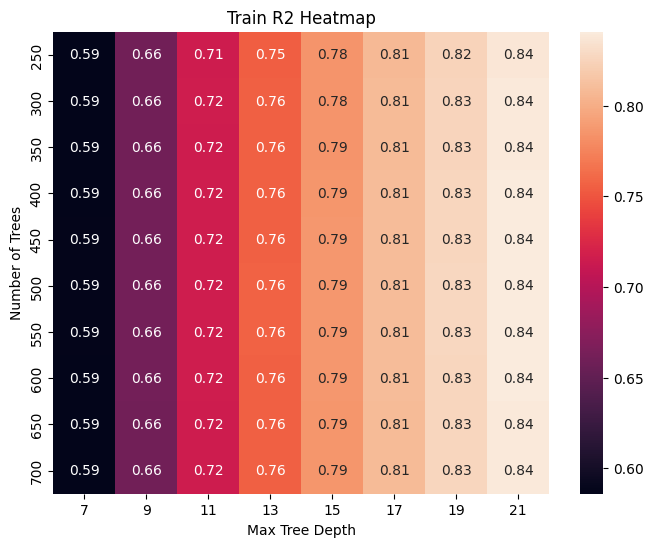

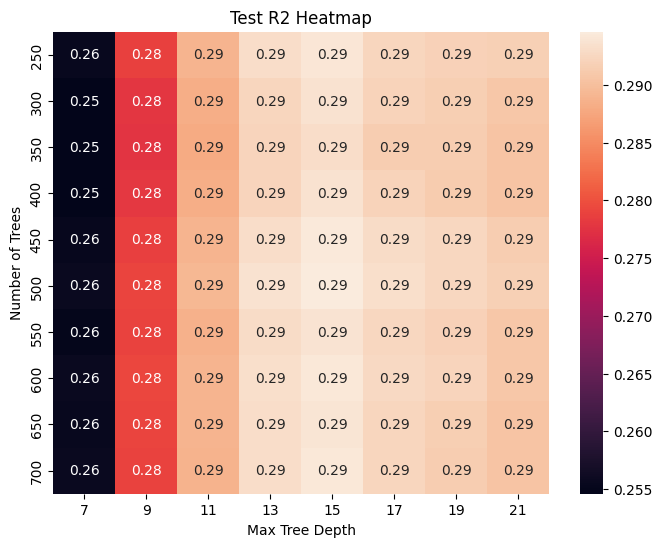

In [ ]:
# Pre-define training and testing splits (from quality score prediction)
X = qData_encoded.drop(['quality_score', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Sweetness'], axis=1)
y = qData_encoded['quality_score']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

n_trees_list = [250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
tree_depth = [7, 9, 11, 13, 15, 17, 19, 21]

# Create arrays to hold averaged metrics
train_mean_r2 = np.zeros((len(n_trees_list), len(tree_depth)))
test_mean_r2  = np.zeros((len(n_trees_list), len(tree_depth)))

for i, n_trees in enumerate(tqdm(n_trees_list, desc="Trees")):
    for j, depth in enumerate(tree_depth):
        train_r2_vals, test_r2_vals = [], []
        for n in range(1, 6):
            model = RandomForestRegressor(n_estimators=n_trees, max_depth=depth, random_state=n)
            model.fit(x_train, y_train)
            train_r2_vals.append(r2_score(y_train, model.predict(x_train)))
            test_r2_vals.append(r2_score(y_test, model.predict(x_test)))
        train_mean_r2[i, j] = np.mean(train_r2_vals)
        test_mean_r2[i, j]  = np.mean(test_r2_vals)

# Plot Heatmap for Train R2
plt.figure(figsize=(8, 6))
sns.heatmap(train_mean_r2, annot=True, fmt=".2f", xticklabels=tree_depth, yticklabels=n_trees_list)
plt.xlabel('Max Tree Depth')
plt.ylabel('Number of Trees')
plt.title('Train R2 Heatmap')
plt.show()

# Plot Heatmap for Test R2
plt.figure(figsize=(8, 6))
sns.heatmap(test_mean_r2, annot=True, fmt=".2f", xticklabels=tree_depth, yticklabels=n_trees_list)
plt.xlabel('Max Tree Depth')
plt.ylabel('Number of Trees')
plt.title('Test R2 Heatmap')
plt.show()


# Classification Analysis – Predict Processing Method
After balancing the dataset, this block applies classification models (Decision Trees, Random Forests, and an Neural Networks) to predict the coffee processing method and evaluates performance using metrics and visualizations.

<ipython-input-9-591a68226942>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




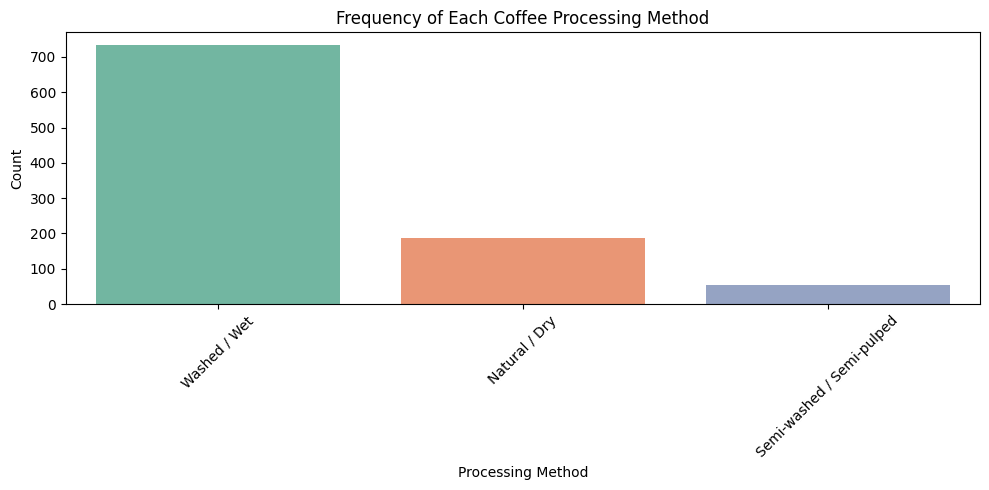

In [9]:
#A visualisation of the unbalanced Data

processing_counts = data['Processing Method'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=processing_counts.index, y=processing_counts.values, palette='Set2')

plt.title('Frequency of Each Coffee Processing Method')
plt.xlabel('Processing Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

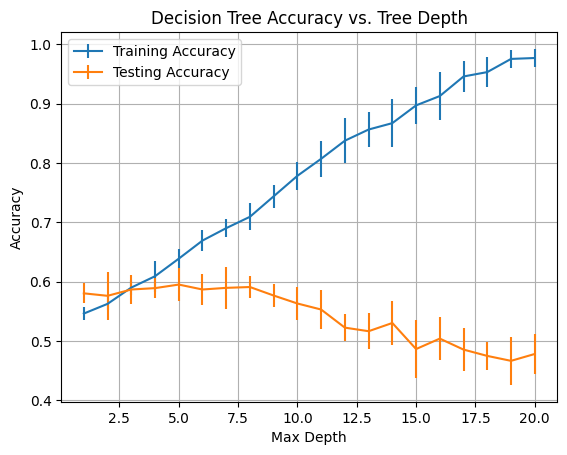

RF Trees: 100%|██████████| 10/10 [03:54<00:00, 23.41s/it]


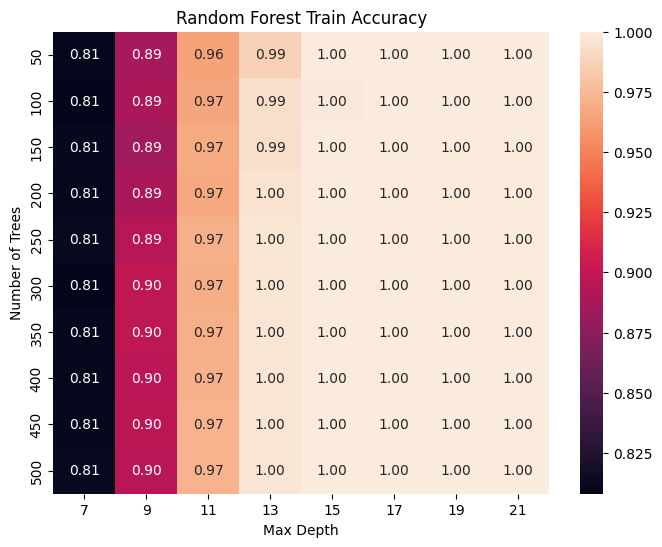

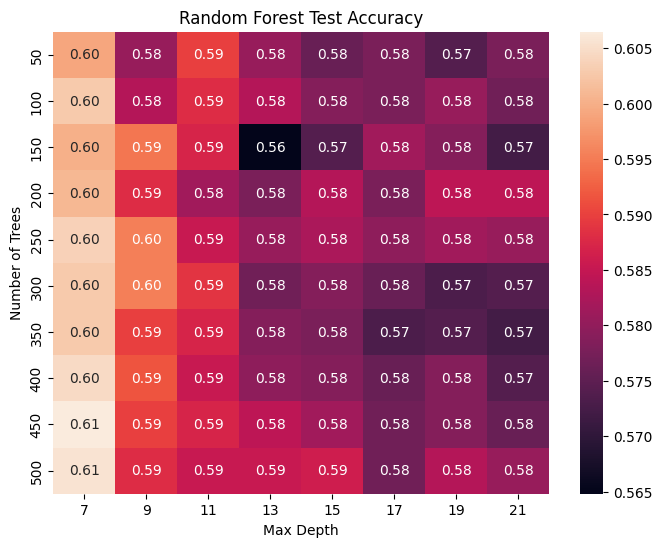

ANN Classifier Metrics:
Precision: 0.35981308411214946
Recall: 0.3354975845410628
F1 Score: 0.25324414530447187


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



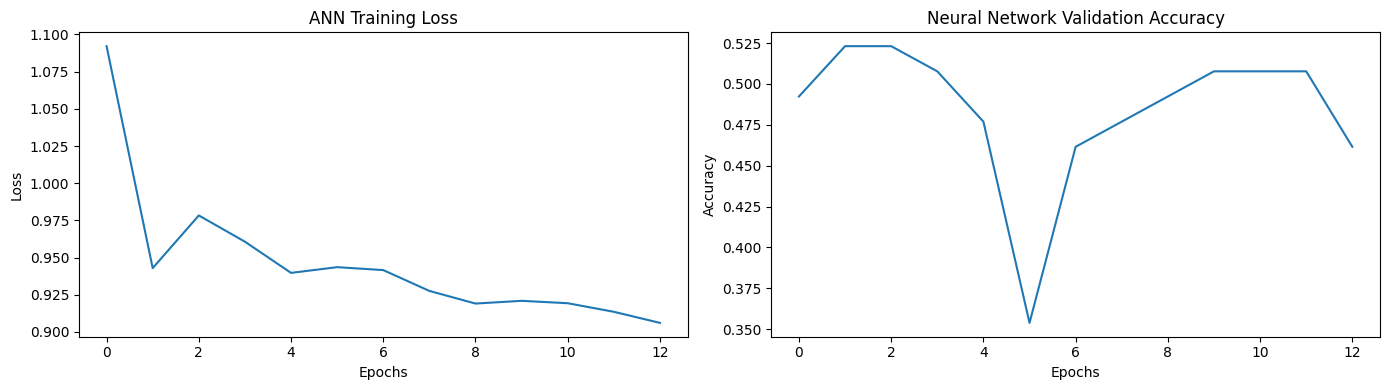

In [ ]:
# Rebalance the dataset so that "Washed / Wet" does not dominate.
washed = data[data['Processing Method'] == 'Washed / Wet']
washed_sampled = washed.sample(n=300, random_state=42)
non_washed = data[data['Processing Method'] != 'Washed / Wet']
balanced_data = pd.concat([washed_sampled, non_washed])

# Create the classification dataset by selecting relevant features and dropping missing values.
class_data = balanced_data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                              'Balance', 'Moisture', 'Category One Defects', 'Category Two Defects', 'Quakers', 'Processing Method']]
class_data = class_data.dropna()

# Separate predictors (X_class) and target variable (y_class).
X_class = class_data.drop(['Processing Method'], axis=1)
y_class = class_data['Processing Method']

# Encode the target labels into integer values.
le = LabelEncoder()
y_encoded = le.fit_transform(y_class)

# Split the dataset into training and testing sets (60% train, 40% test).
x_train, x_test, y_train, y_test = train_test_split(X_class, y_encoded, test_size=0.4, random_state=42)

# Decision Tree Classification: Evaluate models with max depth varying from 1 to 20.
train_acc_mean, train_acc_std = [], []
test_acc_mean, test_acc_std = [], []
for depth in range(1, 21):
    train_scores, test_scores = [], []
    for r in range(1, 11):
        dt_model = DecisionTreeClassifier(max_depth=depth, splitter="random", random_state=r)
        dt_model.fit(x_train, y_train)
        train_scores.append(dt_model.score(x_train, y_train))
        test_scores.append(dt_model.score(x_test, y_test))
    train_acc_mean.append(np.mean(train_scores))
    train_acc_std.append(np.std(train_scores))
    test_acc_mean.append(np.mean(test_scores))
    test_acc_std.append(np.std(test_scores))

# Plot the decision tree training and testing accuracy with error bars versus tree depth.
plt.errorbar(range(1, 21), train_acc_mean, yerr=train_acc_std, label='Training Accuracy')
plt.errorbar(range(1, 21), test_acc_mean, yerr=test_acc_std, label='Testing Accuracy')
plt.title('Decision Tree Accuracy vs. Tree Depth')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Classification: Evaluate combinations of number of trees and max tree depth.
n_trees_list_class = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
tree_depth_class = [7, 9, 11, 13, 15, 17, 19, 21]
train_acc = np.zeros((len(n_trees_list_class), len(tree_depth_class)))
test_acc = np.zeros((len(n_trees_list_class), len(tree_depth_class)))

# For each combination of parameters, run 5 iterations and compute average training and testing accuracy.
for i, n_trees in enumerate(tqdm(n_trees_list_class, desc="RF Trees")):
    for j, depth in enumerate(tree_depth_class):
        temp_train, temp_test = [], []
        for r in range(1, 6):
            rf_model = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, random_state=r)
            rf_model.fit(x_train, y_train)
            temp_train.append(rf_model.score(x_train, y_train))
            temp_test.append(rf_model.score(x_test, y_test))
        train_acc[i, j] = np.mean(temp_train)
        test_acc[i, j] = np.mean(temp_test)

# Plot heatmaps for Random Forest training and testing accuracy.
plt.figure(figsize=(8,6))
sns.heatmap(train_acc, annot=True, fmt=".2f", xticklabels=tree_depth_class, yticklabels=n_trees_list_class)
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.title('Random Forest Train Accuracy')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(test_acc, annot=True, fmt=".2f", xticklabels=tree_depth_class, yticklabels=n_trees_list_class)
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.title('Random Forest Test Accuracy')
plt.show()

# Neural Network Classification: Train a multi-layer perceptron and evaluate its performance.
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes=(32, 64, 32), max_iter=500, early_stopping=True, validation_fraction=0.2)
ann_model.fit(x_train, y_train)
y_pred_ann = ann_model.predict(x_test)

# Output the precision, recall, and F1 score for the ANN classifier.
print("ANN Classifier Metrics:")
print("Precision:", precision_score(y_test, y_pred_ann, average='macro'))
print("Recall:", recall_score(y_test, y_pred_ann, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_ann, average='macro'))

# Plot the ANN training loss curve and validation accuracy over epochs.
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(ann_model.loss_curve_, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ANN Training Loss")
plt.subplot(1, 2, 2)
plt.plot(ann_model.validation_scores_, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network Validation Accuracy")
plt.tight_layout()
plt.show()



# Recommender System Implementation
Creates a simple recommender system by calculating cosine similarity between user-defined taste profiles (or given coffees) and the coffee taste features to generate recommendations.

In [10]:
# Data Preparation for Recommender
# Use a subset of columns relevant for taste
rData = data[['Owner', 'Country of Origin', 'Region', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']]
# Remove rows with missing taste reviews or invalid Region/Owner
target_cols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
rData = rData[~(rData[target_cols] == 0).all(axis=1)]
rData = rData.dropna(subset=['Region', 'Owner'])
rData['Region'] = rData['Region'].str.title()
rData = rData[rData['Region'] != 'Test'].reset_index(drop=True)

# Create Combined Features for Taste
# Normalize taste scores by dividing by 10
rData["Features"] = rData.apply(lambda row: np.array([
    row["Aroma"] / 10, row["Flavor"] / 10, row["Aftertaste"] / 10,
    row["Acidity"] / 10, row["Body"] / 10, row["Balance"] / 10
]), axis=1)

# Recommender using Cosine Similarity
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Example: Given a user’s taste profile
userInput = [7, 8, 9, 6, 9, 8]
rData['CosineSims'] = rData["Features"].apply(lambda feat: cosine_sim(feat, userInput))
rData_sorted = rData.sort_values(by="CosineSims", ascending=False)
print("Top Recommendations Based on User Input:")
print(rData_sorted[['Features', 'Owner', 'Country of Origin', 'Region', 'CosineSims']].head(5))

# Recommendation Extension using Seed Coffees
# Select 2 random seed coffees and compute average feature vector
seed_coffees = rData.sample(2, random_state=42)
seed_names = seed_coffees["Owner"].tolist()
print("Seed Coffees:", seed_names)
seed_features = np.mean(np.vstack(seed_coffees["Features"].values), axis=0)

# Compute similarity to seed
rData["similarity_to_seed"] = rData["Features"].apply(lambda features: cosine_sim(features, seed_features))
recommendations_multi = rData[~rData["Owner"].isin(seed_names)].sort_values(by="similarity_to_seed", ascending=False)
print(f"Recommendations if you liked {seed_names}:")
print(recommendations_multi[["Owner", "Country of Origin", "Region", "similarity_to_seed"]].head(5))


Top Recommendations Based on User Input:
                                       Features  \
792   [0.767, 0.75, 0.742, 0.525, 0.767, 0.775]   
191    [0.758, 0.783, 0.767, 0.725, 0.8, 0.775]   
898   [0.683, 0.717, 0.717, 0.692, 0.75, 0.708]   
323  [0.758, 0.767, 0.767, 0.717, 0.775, 0.783]   
771   [0.683, 0.742, 0.742, 0.717, 0.75, 0.742]   

                                Owner Country of Origin       Region  \
792                Racafe & Cia S.C.A          Colombia      Guayatá   
191                   Ipanema Coffees            Brazil  South Minas   
898  Asociación Aldea Global Jinotega         Nicaragua     Jinotega   
323                   CARCAFE LTDA CI          Colombia        Huila   
771               松澤宏樹 Koju Matsuzawa          Thailand    Chiangrai   

     CosineSims  
792    0.995475  
191    0.993877  
898    0.993693  
323    0.993541  
771    0.993364  
Seed Coffees: ['Olam Agro Colombia', 'PRODUCTOS Y SERVICIOS CHILINDRON S.A. DE C.V.']
Recommendations if you li

# Clustering and Visualization
Here, k-means clustering is performed on the coffee taste features with PCA applied for visualization, including an elbow method analysis and silhouette scoring to assess optimal clustering.

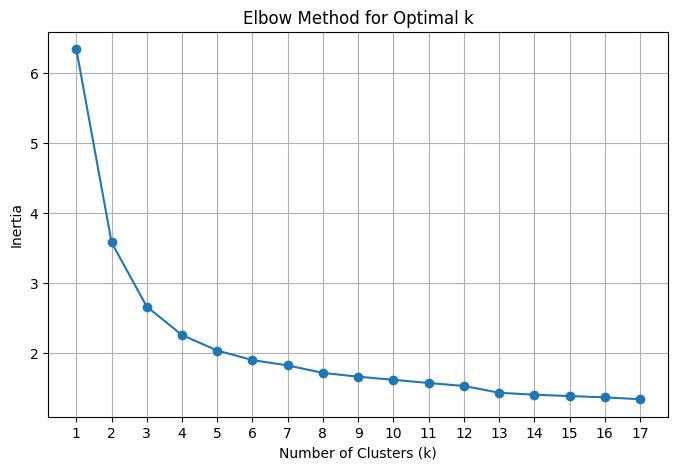

For k=2, silhouette score: 0.3668
For k=3, silhouette score: 0.3162
For k=4, silhouette score: 0.2658
For k=5, silhouette score: 0.2284
For k=6, silhouette score: 0.1860
For k=7, silhouette score: 0.1720
For k=8, silhouette score: 0.1657
For k=9, silhouette score: 0.1547
For k=10, silhouette score: 0.1556


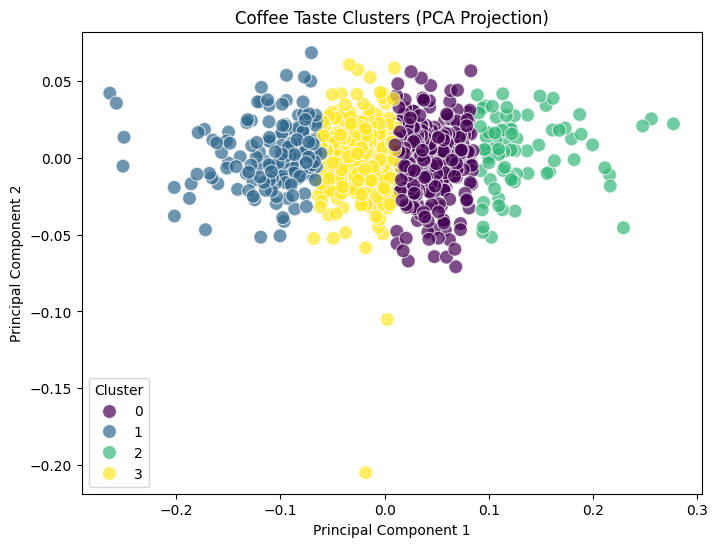

Coffees per cluster:
Cluster
0    390
1    170
2     77
3    390
dtype: int64


In [ ]:

# Stack feature vectors for clustering
taste_features = np.vstack(rData["Features"].values)

# Elbow Method for KMeans
k_values = range(1, 18)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(taste_features)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# PCA and KMeans Clustering
pca = PCA(n_components=2)
taste_features_pca = pca.fit_transform(taste_features)
n_clusters = 4  # Experiment as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(taste_features)
rData['Cluster'] = clusters
rData['PCA1'] = taste_features_pca[:, 0]
rData['PCA2'] = taste_features_pca[:, 1]

# Compute silhouette scores for various k
for k in range(2, 11):
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_test.fit_predict(taste_features)
    score = silhouette_score(taste_features, labels)
    print(f"For k={k}, silhouette score: {score:.4f}")

# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=rData, palette="viridis", s=100, alpha=0.7)
plt.title("Coffee Taste Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Print number of coffees per cluster
print("Coffees per cluster:")
print(rData.groupby('Cluster').size())
